
## **Librerías que se usarán.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#Dataset extraido de: https://www.kaggle.com/c/titanic/data
train  = pd.read_csv('train.csv')
test   = pd.read_csv('test.csv')
target = pd.read_csv('gender_submission.csv')


## **Descripción y link del dataset.**

In [ ]:
#Descripción: Es un conjunto de datos para crear un modelo que prediga
#qué pasajeros sobrevivieron al naufragio del Titanic.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



## **Valores extraídos.**

In [ ]:
#Primeros 10 elementos del lote de entrenamiento.
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.86,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.07,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.13,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.07,NaN,C


In [ ]:
#Primeros 10 elementos del lote de prueba
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.22,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.00,0,0,330972,7.63,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,248738,29.00,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,2657,7.23,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.00,2,0,A/4 48871,24.15,NaN,S



## **Valores modificados (eliminación de datos no cuantitativos).**

Como podemos observar, en ambas coleccciones hay datos no cuantitativos, como lo son: PassengerId, Name, Ticket, Cabin, pues son datos que no aportan a la regresió logística, pero sin embargo hay datos cuantitativos que están representados en strings, los cuales se cambiaran a datos numéricos.

In [ ]:
#Cambiando el sexo: 
#   'female' -> 1
#   'male'   -> 0
train['Sex'] = train['Sex'].replace(['female'],0)
train['Sex'] = train['Sex'].replace(['male'],1)
test['Sex']  = test['Sex'].replace(['female'],0)
test['Sex']  = test['Sex'].replace(['male'],1)

#Cambiando los valores de embarco:
#   'S' -> 0
#   'C' -> 1
#   'Q' -> 2

train['Embarked'] = train['Embarked'].replace(['S'],0)
train['Embarked'] = train['Embarked'].replace(['C'],1)
train['Embarked'] = train['Embarked'].replace(['Q'],2)
test['Embarked']  = test['Embarked'].replace(['S'],0)
test['Embarked']  = test['Embarked'].replace(['C'],1)
test['Embarked']  = test['Embarked'].replace(['Q'],2)

#Eliminando datos no cuantitativos
train = train.drop(['Name'],1)
test  = test.drop(['Name'],1)

train = train.drop(['Ticket'],1)
test  = test.drop(['Ticket'],1)

train = train.drop(['Cabin'],1)
test  = test.drop(['Cabin'],1)

train = train.drop(['PassengerId'],1)
test  = test.drop(['PassengerId'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/pytho

In [ ]:
#Limpiar NaN de las columnas.
tribs = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
for i in np.arange(len(tribs)):
    train[tribs[i]] = train[tribs[i]].fillna(0)
    test[tribs[i]] = test[tribs[i]].fillna(0)
    


## **Nuevos valores en el Data Frame.**

A continuación se puede observar que los datos fueron modificados y limpiados de los datos originales con la finalidad de que la red acepte todos los valores de forma numérica.

In [ ]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.00,1,0,7.25,0.00
1,1,1,0,38.00,1,0,71.28,1.00
2,1,3,0,26.00,0,0,7.92,0.00
3,1,1,0,35.00,1,0,53.10,0.00
4,0,3,1,35.00,0,0,8.05,0.00
5,0,3,1,0.00,0,0,8.46,2.00
6,0,1,1,54.00,0,0,51.86,0.00
7,0,3,1,2.00,3,1,21.07,0.00
8,1,3,0,27.00,0,2,11.13,0.00
9,1,2,0,14.00,1,0,30.07,1.00


In [ ]:
test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50,0,0,7.83,2
1,3,0,47.00,1,0,7.00,0
2,2,1,62.00,0,0,9.69,2
3,3,1,27.00,0,0,8.66,0
4,3,0,22.00,1,1,12.29,0
5,3,1,14.00,0,0,9.22,0
6,3,0,30.00,0,0,7.63,2
7,2,1,26.00,1,1,29.00,0
8,3,0,18.00,0,0,7.23,1
9,3,1,21.00,2,0,24.15,0


In [ ]:
target.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [ ]:
print(f'El tamaño del lote de entrenamiento es de {train.shape[0]}')
print(f'El tamaño del lote de prueba es de {test.shape[0]}')

El tamaño del lote de entrenamiento es de 891
El tamaño del lote de prueba es de 418



## **Datos estadísticos sobre el dataset.**

Se puede observar que hay un promedio de edad de aproximadamente 24 años, también que el 65% de la gente es del sexo masculino, mientras que el 35% es femenino, estos datos sin importantes más adelante en las gráficas donde se observan que hay una gran concentración de gente que murió o sobrevivió en el rango de edad de 20-30

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' %x)
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,0.38,2.31,0.65,23.80,0.52,0.38,32.20,0.36
std,0.49,0.84,0.48,17.60,1.10,0.81,49.69,0.64
min,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,2.00,0.00,6.00,0.00,0.00,7.91,0.00
50%,0.00,3.00,1.00,24.00,0.00,0.00,14.45,0.00
75%,1.00,3.00,1.00,35.00,1.00,0.00,31.00,1.00
max,1.00,3.00,1.00,80.00,8.00,6.00,512.33,2.00


Sobrevivientes distribuidos por edad

> Bloc con sangría



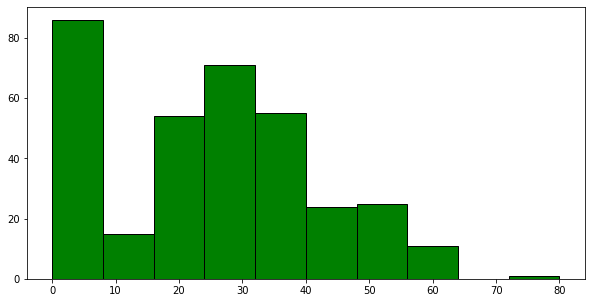

In [ ]:
train[train.Survived==1].Age.hist(figsize=[10,5],bins=10,grid=False,edgecolor='black',color='Green')

Fallecidos distribuidos por edad


No sobrevivientes distribuidos por edad


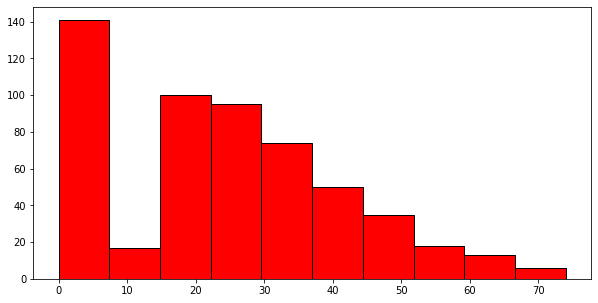

In [ ]:
train[train.Survived==0].Age.hist(figsize=[10,5],bins=10,grid=False,edgecolor='black',color='red')
print("No sobrevivientes distribuidos por edad")

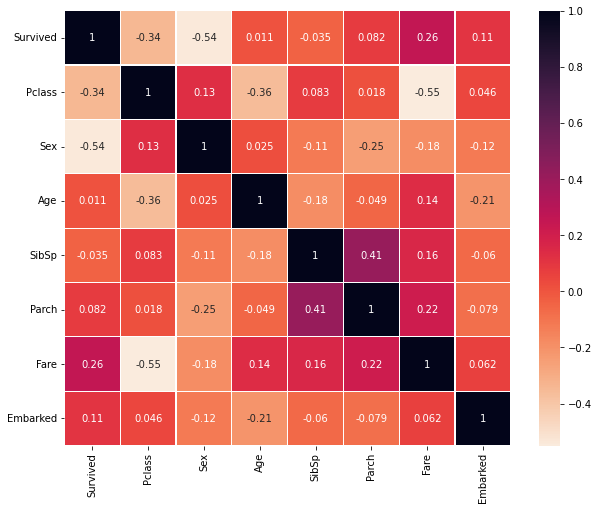

In [ ]:
#Mapa de correlación de los datos.
sns.heatmap(train.corr(), annot=True, cmap='rocket_r', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)


## **Separando los valores y estandarizándolos.**

In [ ]:
X_train = np.array(train.drop(['Survived'],1))
Y_train = np.array(train['Survived'])

X_test  = np.array(test)
Y_test  = np.array(target['Survived'])

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test  = sc.transform(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
print(X_train.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)

(891, 7)
(418, 7)
(891,)
(418,)



## **Realizando la regresión logística.**

In [ ]:
LR = LogisticRegression(max_iter= X_train.shape[0])
LR.fit(X_train,Y_train)
Y_pred = LR.predict(X_train)


## **Análisis de los resultados.**

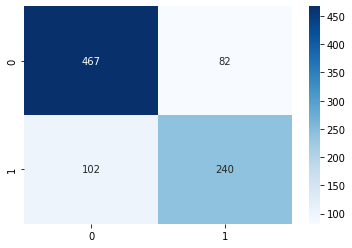

In [ ]:
result = confusion_matrix(Y_train,Y_pred)
sns.heatmap(result, annot=True, cmap='Blues', fmt='g')

In [ ]:
class_names = ['Death', 'Alive']
print(classification_report(Y_train, Y_pred, target_names=class_names))

              precision    recall  f1-score   support

       Death       0.82      0.85      0.84       549
       Alive       0.75      0.70      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



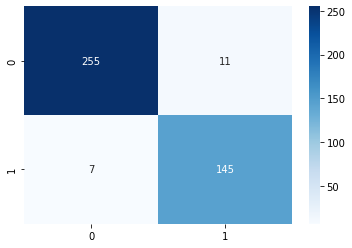

In [ ]:
Yt_pred = LR.predict(X_test)
result2 = confusion_matrix(Y_test,Yt_pred)
sns.heatmap(result2, annot=True, cmap='Blues', fmt='g')

In [ ]:
class_names = ['Death', 'Alive']
print(classification_report(Y_test, Yt_pred, target_names=class_names))

              precision    recall  f1-score   support

       Death       0.97      0.96      0.97       266
       Alive       0.93      0.95      0.94       152

    accuracy                           0.96       418
   macro avg       0.95      0.96      0.95       418
weighted avg       0.96      0.96      0.96       418



In [ ]:
realAliveTrain = np.array(Y_train).tolist().count(1)
predAliveTrain = np.array(Y_pred).tolist().count(1)
realDeathTrain = np.array(Y_train).tolist().count(0)
predDeathTrain = np.array(Y_pred).tolist().count(0)

realAliveTest  = np.array(Y_test).tolist().count(1)
predAliveTest  = np.array(Yt_pred).tolist().count(1)
realDeathTest  = np.array(Y_test).tolist().count(0)
predDeathTest  = np.array(Yt_pred).tolist().count(0)

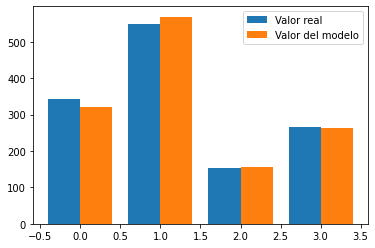

In [ ]:
x = np.arange(4) 
y1 = [realAliveTrain, realDeathTrain, realAliveTest, realDeathTest] 
y2 = [predAliveTrain, predDeathTrain, predAliveTest, predDeathTest] 
width = 0.40
  
plt.bar(x-0.2, y1, width) 
plt.bar(x+0.2, y2, width) 
plt.legend(["Valor real", "Valor del modelo"], loc=0, frameon=True)   